# Identification
Please indicate your name

Student 1: Simon GROC

Student 2: Imane HIBAOUI

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [2]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercise: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [3]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))
    
def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(If))
    
def thresholdImage(I, s):
    """ Array*int -> Array """
    I_copy = np.copy(I)
    return I_copy > s

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

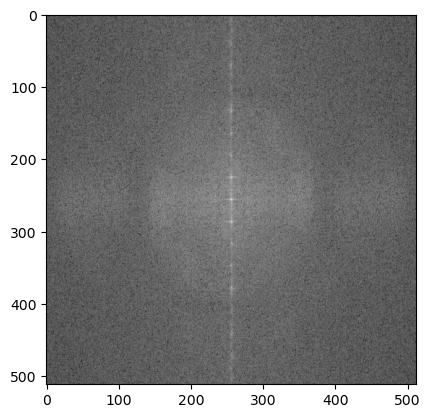

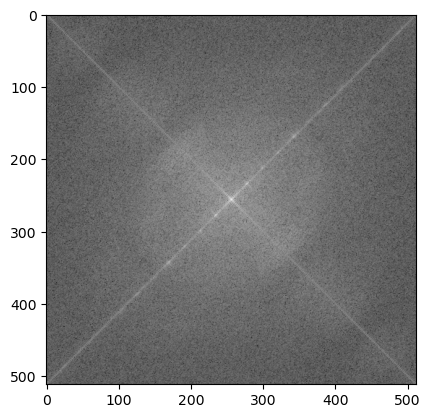

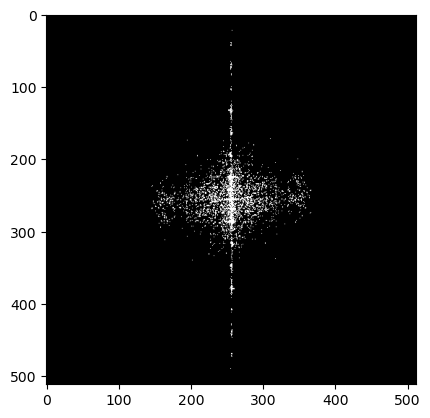

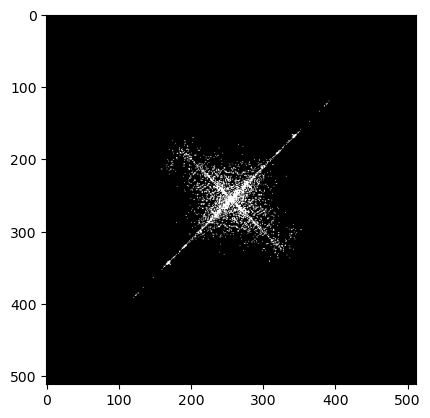

In [4]:
import matplotlib.pyplot as plt

sonF = computeFT(son)
sonrotF = computeFT(sonrot)
sonFT = toVisualizeFT(sonF)
sonrotFT = toVisualizeFT(sonrotF)

plt.imshow(toVisualizeLogFT(sonFT), cmap='gray')
plt.show()

plt.imshow(toVisualizeLogFT(sonrotFT), cmap='gray')
plt.show()

sonTH = thresholdImage(sonFT, 1e5)
plt.imshow(sonTH, cmap='gray')
plt.show()

sonrotTH = thresholdImage(sonrotFT, 1e5)
plt.imshow(sonrotTH, cmap='gray')
plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

On peut observer qu'il y a plus de hautes fréquences dans l'axe vertical du spectre de l'image. De plus, on remarque la rotation de l'image représentée par la rotation des hautes fréquences dans le spectre de sonrot.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [5]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1+(1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

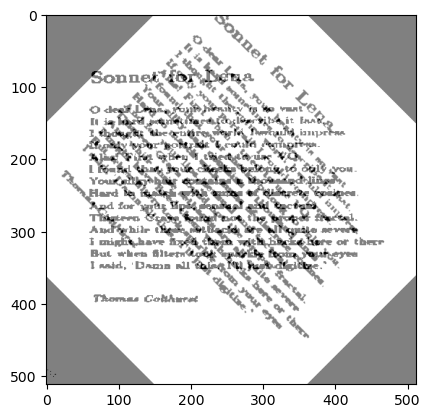

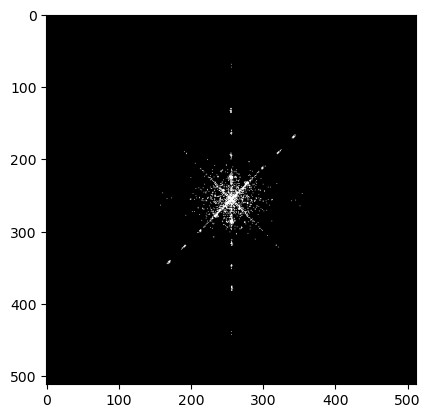

In [6]:
sonSonrotBlend = blend(son, sonrot, 0.5)
plt.imshow(sonSonrotBlend, cmap='gray')
plt.show()
sonSonrotBlendF = computeFT(sonSonrotBlend)
sonSonrotBlendFT = toVisualizeFT(sonSonrotBlendF)
sonSonrotBlendTH = thresholdImage(sonSonrotBlendFT, 1e5)
plt.imshow(sonSonrotBlendTH, cmap='gray')
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

Ce spectre nous montre les distributions qui résultent de la somme des deux transformées de Fourier précédentes, ce qui met en évidence la propriété de linéarité des transformées de Fourier.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

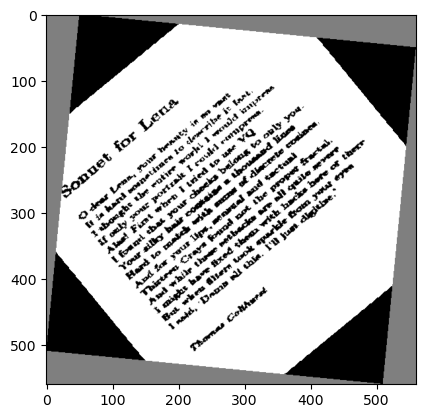

Angle détecté : -45.0


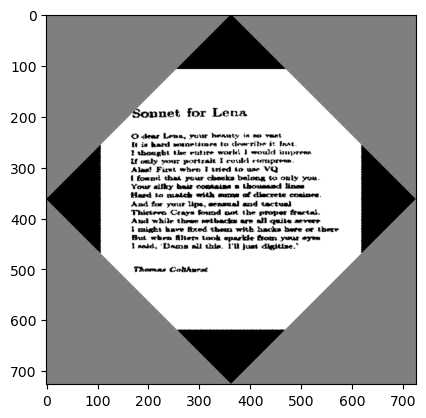

In [82]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0][0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

def rectifyOrientation(I):
    """ Array -> Array
        Corrige l'orientation d'une image
    """

    FT = computeFT(I)
    FT_module = toVisualizeFT(FT)
    thresholded_FT = thresholdImage(FT_module, 1e5)
    _, main_angle = mainOrientation(thresholded_FT)
    print(f"Angle détecté : {main_angle}")
    rectified_image = rotateImage(I, -main_angle)  

    return rectified_image


# Utilisation de rectifyOrientation() avec une image exemple sonrot
rotate = mainOrientation(sonrot)[1]
plt.imshow(rotateImage(sonrot, rotate), cmap='gray')
plt.show()




8. Experiment `rectifyOrientation()` on `sonrot`, and on rotations of `img/port.jpg` (using `rotateImage()`) with various angles.  

Angle détecté : -45.0
Image sonrot après rectification :


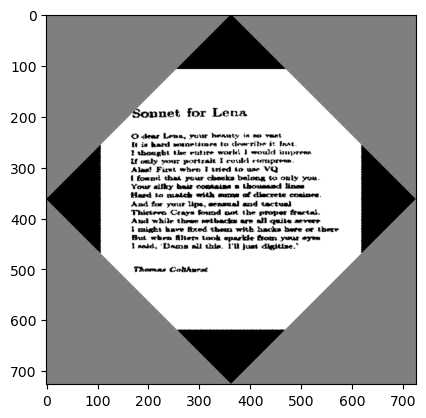

Angle détecté : 16.875
Image port après rotation de 15° et rectification :


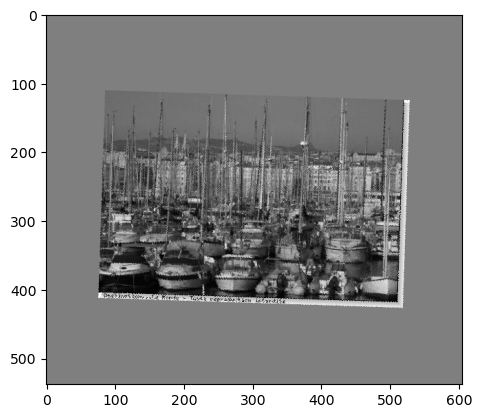

Angle détecté : 45.0
Image port après rotation de 45° et rectification :


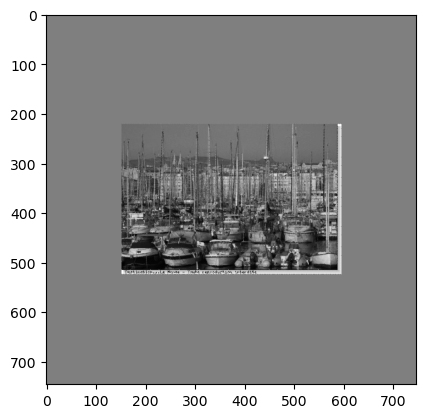

Angle détecté : 50.625
Image port après rotation de 50° et rectification :


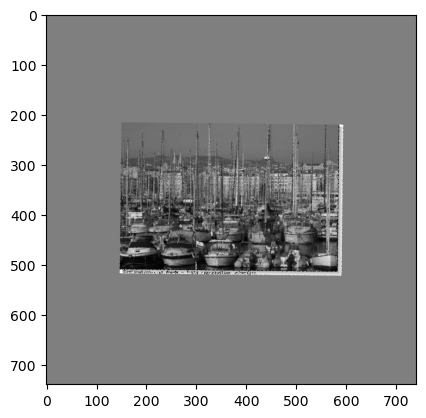

In [92]:
port_img = np.array(Image.open('img/port.jpg'))  # Image port.jpg

# 1. Appliquer rectifyOrientation() sur l'image sonrot
rectified_sonrot = rectifyOrientation(sonrot)

# Afficher l'image corrigée de sonrot
print("Image sonrot après rectification :")
plt.imshow(rectified_sonrot, cmap='gray')
plt.show()

angles = [15, 45, 50] 
for angle in angles:
    rotated_port_img = rotateImage(port_img, angle)
    rectified_port_img = rectifyOrientation(rotated_port_img)

    print(f"Image port après rotation de {angle}° et rectification :")
    plt.imshow(rectified_port_img, cmap='gray')
    plt.show()
